In [1]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
import pickle

In [2]:
from seam_carve import seam_carve

In [3]:
def seam_coords(seam_mask):
    coords = np.where(seam_mask)
    t = [i for i in zip(coords[0], coords[1])]
    t.sort(key = lambda i: i[0])
    return tuple(t)

def msk_to_std(msk):
    return ((msk[:,:,0]!=0)*(-1) + (msk[:,:,1]!=0)).astype('int8')

In [4]:
img = io.imread("../tests/pic_02.png")
img_mask = io.imread("../tests/pic_02_mask.png")

In [5]:
tmp, _, mask = seam_carve(img, 'horizontal shrink', msk_to_std(img_mask))

In [6]:
f = open('../tests/pic_02_seams', 'rb')
ans = []
while True:
    try:
        ans += [pickle.load(f)]
    except:
        break

In [7]:
mask_true = np.zeros_like(mask)
for i, j in ans[4]:
    mask_true[i, j] = 1

In [8]:
np.all(mask == mask_true)

True

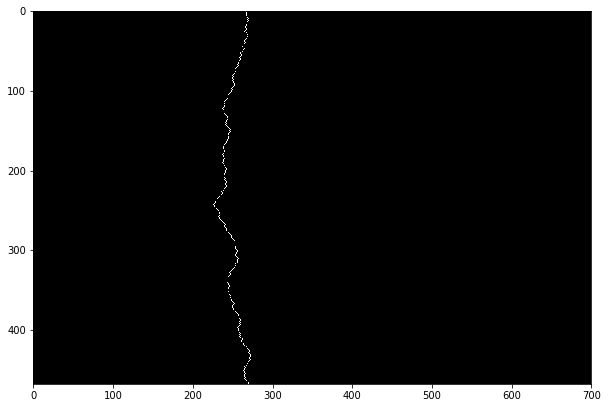

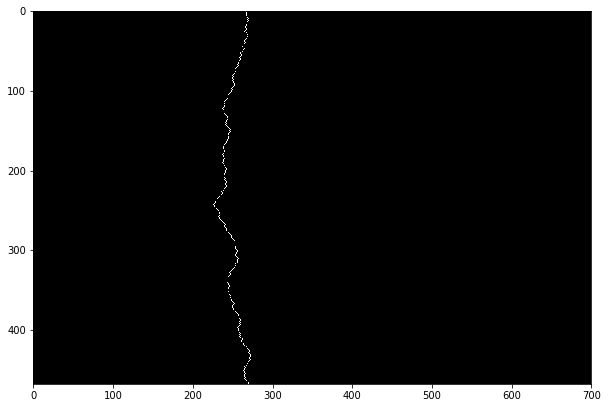

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(mask_true, cmap='gray')
plt.show()